In [1]:
import pandas as pd
import csv

In [2]:
#Retweet Network
path = '../data/processed'

ktz = pd.read_csv(path + '/katz_centrality_1e1.csv')
ltcA = pd.read_csv(path + '/lineal_threshold_centrality_alternative.csv')
pgr = pd.read_csv(path + '/page_rank.csv')
deg = pd.read_csv(path + '/degree_centrality.csv')
clos = pd.read_csv(path +'/closseness_centrality.csv')
bet = pd.read_csv(path +'/betweenness_centrality.csv')

In [3]:
#ltc = (ltc - ltc.mean()) / (ltc.max() - ltc.min())

In [4]:
ltc_dict = {}
with open(path + '/lineal_threshold_centrality.csv', 'r') as csvfile:
    lineal_threshold = csv.reader(csvfile, delimiter=',')
    for row in lineal_threshold:
        k, v = row
        ltc_dict[k] = v

In [5]:
ltc = pd.DataFrame([[key,value] for key,value in ltc_dict.items()],columns=["node","lineal_threshold"])
# ltc.head()

In [6]:
del ltcA['node']
del ltc['node']
del pgr['node']
del deg['node']
del clos['node']
del bet['node']

In [27]:
influence_model = pd.concat([ktz,ltc, ltcA, pgr, deg, clos, bet], axis=1)
influence_model['lineal_threshold'] = influence_model['lineal_threshold'].convert_objects(convert_numeric=True)
influence_model.head()

/usr/local/lib/python3.4/dist-packages/ipykernel/__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


,node,katz_centrality,lineal_threshold,lineal_threshold_alternative,pagerank,degree,closs,betweenness
0,2,0.001769,485,1,0.000003,0.000004,0.000000,0.000000
1,3,0.001769,1041,1,0.000003,0.000004,0.000000,0.000000
2,4,0.003088,242,93,0.000004,0.000320,0.000329,0.000002
3,5,0.001608,1018,26,0.000003,0.000094,0.000096,0.000000
4,6,0.001608,482,85,0.000003,0.000324,0.000324,0.000000


In [28]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%pylab inline

pylab.rcParams['figure.figsize'] = (12, 7)

Populating the interactive namespace from numpy and matplotlib


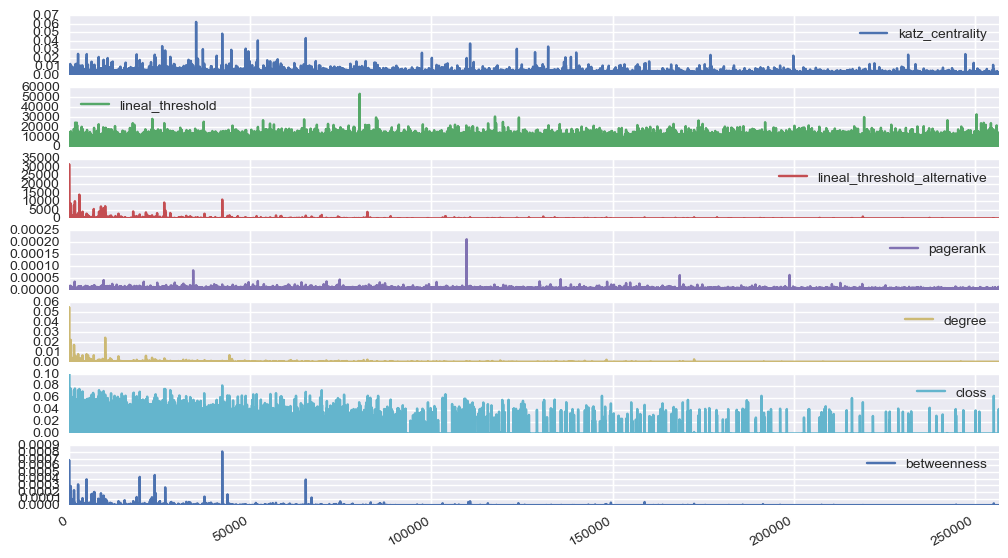

In [33]:
influence_model['node'] = influence_model['node'].astype(str)

_ = influence_model.plot(subplots=True)
#_ = influence_model.plot()

In [10]:
#_ = influence_model.plot.bar()

In [34]:
influence_model.corr()

,katz_centrality,lineal_threshold,lineal_threshold_alternative,pagerank,degree,closs,betweenness
katz_centrality,1.000000,-0.000584,0.108513,0.299347,0.057068,0.158626,0.291672
lineal_threshold,-0.000584,1.000000,-0.001480,0.000910,-0.002376,0.002083,-0.000937
lineal_threshold_alternative,0.108513,-0.001480,1.000000,0.017692,0.810747,0.308586,0.630616
pagerank,0.299347,0.000910,0.017692,1.000000,0.015809,0.042158,0.074014
degree,0.057068,-0.002376,0.810747,0.015809,1.000000,0.232486,0.468540
closs,0.158626,0.002083,0.308586,0.042158,0.232486,1.000000,0.279845
betweenness,0.291672,-0.000937,0.630616,0.074014,0.468540,0.279845,1.000000


In [35]:
influence_model.corr(method='spearman')

,katz_centrality,lineal_threshold,lineal_threshold_alternative,pagerank,degree,closs,betweenness
katz_centrality,1.000000,-0.002465,-0.357692,0.387972,0.447223,-0.356765,0.189998
lineal_threshold,-0.002465,1.000000,-0.001506,-0.000927,-0.005192,-0.001450,0.001594
lineal_threshold_alternative,-0.357692,-0.001506,1.000000,-0.365848,0.399200,0.999744,0.534282
pagerank,0.387972,-0.000927,-0.365848,1.000000,0.164376,-0.365118,0.137843
degree,0.447223,-0.005192,0.399200,0.164376,1.000000,0.399223,0.425479
closs,-0.356765,-0.001450,0.999744,-0.365118,0.399223,1.000000,0.535385
betweenness,0.189998,0.001594,0.534282,0.137843,0.425479,0.535385,1.000000


In [36]:
influence_model.corr(method='kendall')

,katz_centrality,lineal_threshold,lineal_threshold_alternative,pagerank,degree,closs,betweenness
katz_centrality,1.000000,-0.001800,-0.309507,0.289033,0.404786,-0.308525,0.166616
lineal_threshold,-0.001800,1.000000,-0.001208,-0.000631,-0.004101,-0.001162,0.001300
lineal_threshold_alternative,-0.309507,-0.001208,1.000000,-0.294447,0.379637,0.995726,0.518542
pagerank,0.289033,-0.000631,-0.294447,1.000000,0.133118,-0.293592,0.112294
degree,0.404786,-0.004101,0.379637,0.133118,1.000000,0.378708,0.406777
closs,-0.308525,-0.001162,0.995726,-0.293592,0.378708,1.000000,0.519155
betweenness,0.166616,0.001300,0.518542,0.112294,0.406777,0.519155,1.000000
